In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# For plotting the regression tree
from IPython.display import Image
import pydotplus
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras import regularizers

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
df.loc[df['title'].str.contains("Women"), "maincateg"] = "Women"

In [ ]:
df.loc[df['title'].str.contains("Men"), "maincateg"] = "Men"

In [ ]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg      61
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [ ]:
df = df.drop(['id','title','Offer %'], axis = 1)
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
df.isnull().sum()

Rating          0
maincateg      61
platform        0
price1          0
actprice1       0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [ ]:
df['maincateg'] = df['maincateg'].fillna('Women')
df['norating1'] = df['norating1'].fillna(df['norating1'].median())
df['noreviews1'] = df['noreviews1'].fillna(df['noreviews1'].median())

In [ ]:
df = df.drop([ 'star_5f', 'star_4f', 'star_3f','star_1f','star_2f'],axis = 1)
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,fulfilled1
0,3.9,Women,Flipkart,698,999,38.0,7.0,0
1,3.8,Men,Flipkart,999,1999,531.0,69.0,1
2,4.4,Women,Flipkart,2749,4999,17.0,4.0,1
3,4.2,Men,Flipkart,518,724,46413.0,6229.0,1
4,3.9,Men,Flipkart,1379,2299,77.0,3.0,1


In [ ]:
df.isnull().sum()

Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
norating1     0
noreviews1    0
fulfilled1    0
dtype: int64

In [ ]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print(feature_na)

['maincateg', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f']


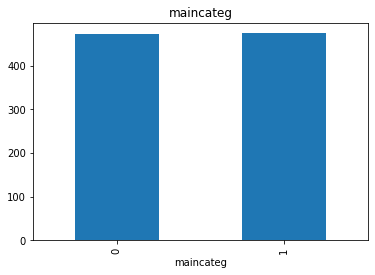

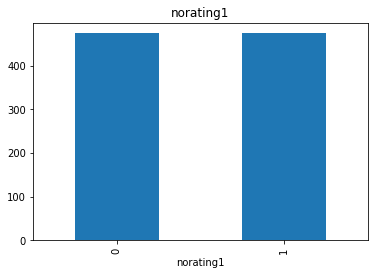

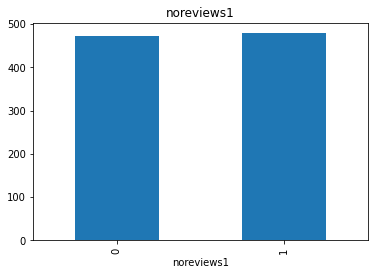

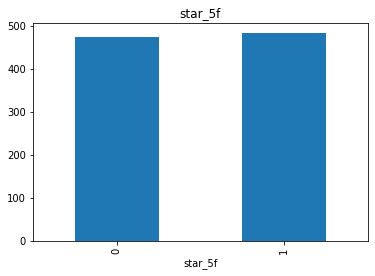

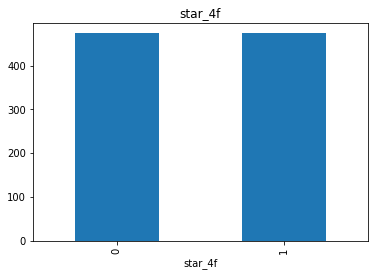

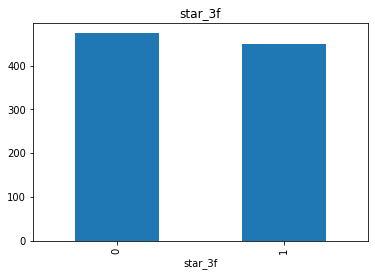

In [ ]:
for features in feature_na:
  data = df.copy()
  data[features] = np.where(data[features].isnull(), 1, 0)
  data.groupby(features)['price1'].median().plot.bar()
  plt.title(features)
  plt.show()

In [ ]:
numerical_features = ['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f']
categorical_features = ['maincateg','platform','fulfilled1']

In [ ]:
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


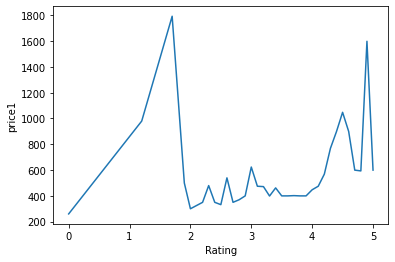

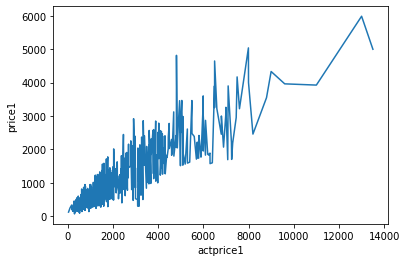

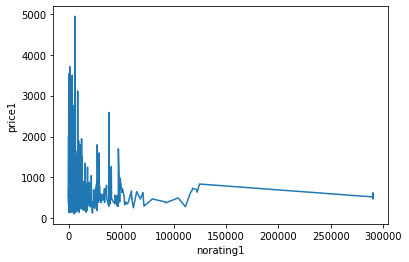

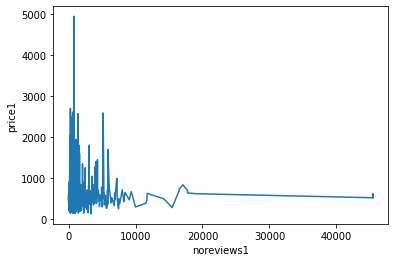

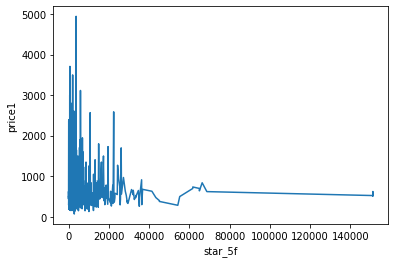

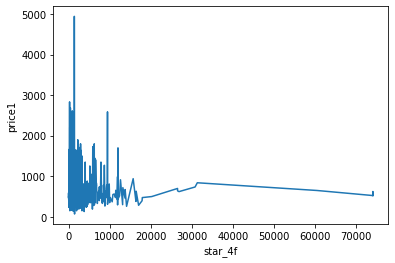

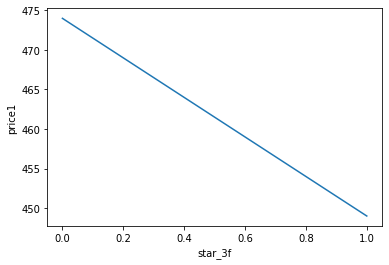

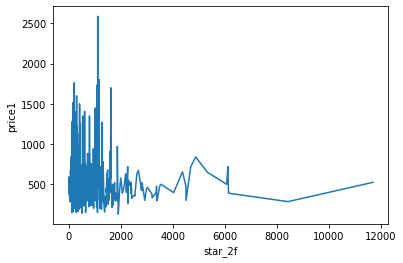

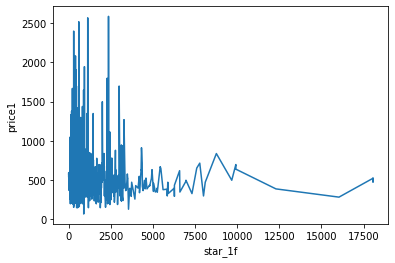

In [ ]:
for feature in df[numerical_features]:
  data.groupby(feature)['price1'].median().plot()
  plt.xlabel(feature)
  plt.ylabel('price1')
  plt.show()

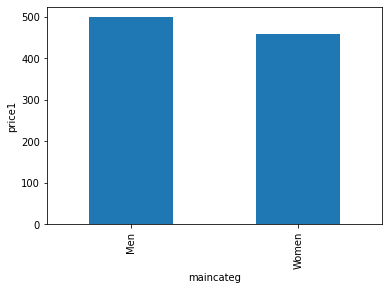

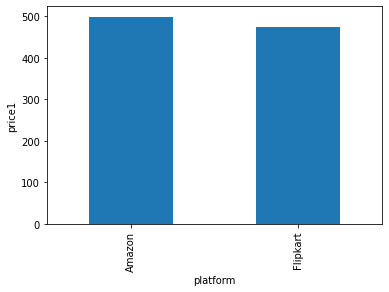

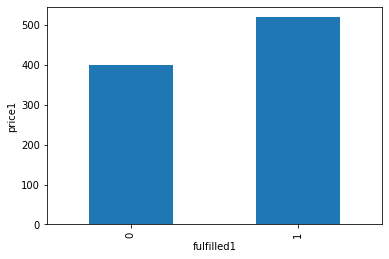

In [ ]:
for feature in df[categorical_features]:
  data.groupby(feature)['price1'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('price1')
  plt.show()

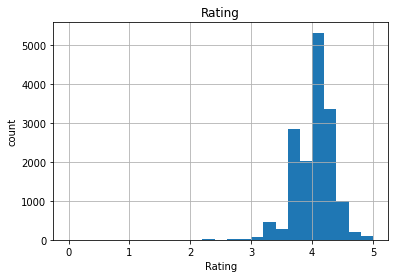

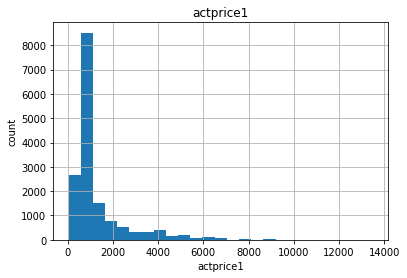

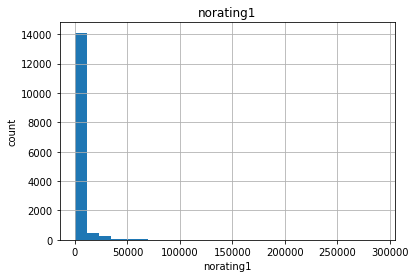

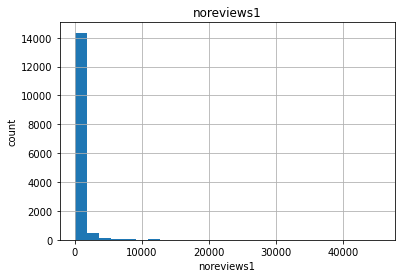

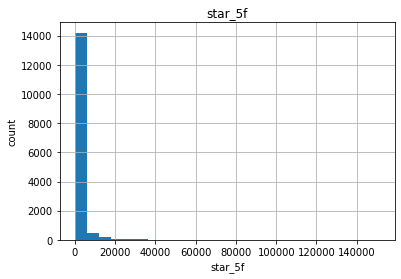

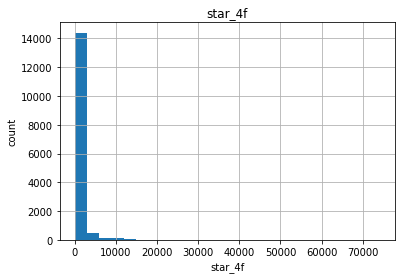

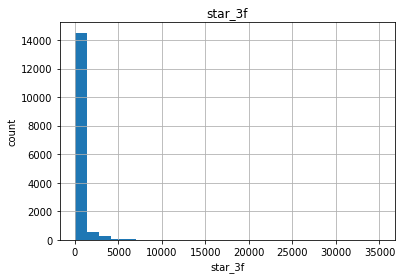

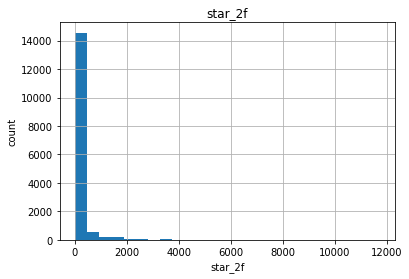

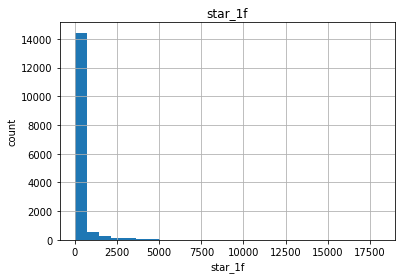

In [ ]:
for feature in numerical_features:
  data = df.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

In [ ]:
df['maincateg'] = df['maincateg'].fillna('Women')
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['star_5f'] = df['star_5f'].fillna(df['star_5f'].median())
df['star_4f'] = df['star_4f'].fillna(df['star_4f'].median())
df['star_3f'] = df['star_3f'].fillna(df['star_3f'].median())
df['norating1'] = df['norating1'].fillna(df['norating1'].median())
df['noreviews1'] = df['noreviews1'].fillna(df['noreviews1'].median())

In [ ]:
df.isnull().sum()

Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [ ]:
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
df = pd.get_dummies(df, columns = ['platform','maincateg'])
df.head()

,Rating,price1,actprice1,norating1,noreviews1,fulfilled1,platform_Amazon,platform_Flipkart,maincateg_Men,maincateg_Women
0,3.9,698,999,38.0,7.0,0,0,1,0,1
1,3.8,999,1999,531.0,69.0,1,0,1,1,0
2,4.4,2749,4999,17.0,4.0,1,0,1,0,1
3,4.2,518,724,46413.0,6229.0,1,0,1,1,0
4,3.9,1379,2299,77.0,3.0,1,0,1,1,0


In [ ]:
num_features = ['actprice1','Rating']
for f in num_features:
  df[f] = np.exp(df[f])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

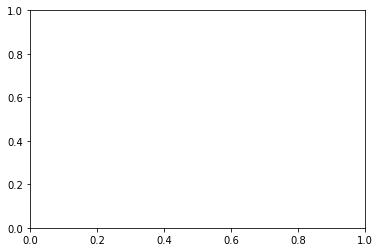

In [ ]:
for feature in num_features:
  data = df.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
y = df['price1']

In [ ]:
X = df.drop(['price1'], axis = 1)
X.head()

,Rating,actprice1,norating1,noreviews1,fulfilled1,platform_Amazon,platform_Flipkart,maincateg_Men,maincateg_Women
0,3.9,999,38.0,7.0,0,0,1,0,1
1,3.8,1999,531.0,69.0,1,0,1,1,0
2,4.4,4999,17.0,4.0,1,0,1,0,1
3,4.2,724,46413.0,6229.0,1,0,1,1,0
4,3.9,2299,77.0,3.0,1,0,1,1,0


In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(X,y)

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False])

In [ ]:
selected_feature = X.columns[(feature_sel_model.get_support())]
print(selected_feature)

Index(['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'platform_Amazon',
       'maincateg_Men'],
      dtype='object')


In [ ]:
X = df[:]
X.head()

,Rating,price1,actprice1,norating1,noreviews1,fulfilled1,platform_Amazon,platform_Flipkart,maincateg_Men,maincateg_Women
0,3.9,698,999,38.0,7.0,0,0,1,0,1
1,3.8,999,1999,531.0,69.0,1,0,1,1,0
2,4.4,2749,4999,17.0,4.0,1,0,1,0,1
3,4.2,518,724,46413.0,6229.0,1,0,1,1,0
4,3.9,1379,2299,77.0,3.0,1,0,1,1,0


In [ ]:
model = RandomForestRegressor(random_state = 2021,max_features = 'sqrt',n_estimators=100,n_jobs =1,oob_score = True)

In [ ]:
model.fit(X,y)

RandomForestRegressor(max_features='sqrt', n_jobs=1, oob_score=True,
                      random_state=2021)

In [ ]:
y_train_pred = model.predict(X)
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y, y_train_pred)))

RMSE score for Training data:  78.38975900193928


In [ ]:
df_test =  pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [ ]:
df_test.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [ ]:

df_test['Rating'] = df_test['Rating'].fillna(df_test['Rating'].mean())


In [ ]:
df_test.loc[df_test['title'].str.contains("Men"), "maincateg"] = "Men"
df_test.loc[df_test['title'].str.contains("Women"), "maincateg"] = "Women"

In [ ]:
df_test['maincateg'] = df_test['maincateg'].fillna('Women')

In [ ]:
df_test.isnull().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [ ]:
df_test = pd.get_dummies(df_test, columns= ['maincateg','platform'])
df_test.head()

,id,title,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,2242,Casuals For Men (Blue),3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,1,0,0,1
1,20532,Women Black Flats Sandal,3.9,499,3015,404,1458.0,657,397,182,321.0,1,0,1,0,1
2,10648,Women Gold Wedges Sandal,3.9,999,449,52,229.0,70,71,33,46.0,1,0,1,0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,2999,290,40,141.0,51,49,17,32.0,1,1,0,0,1
4,12593,Loafers For Men (Tan),3.9,999,2423,326,1265.0,414,293,143,308.0,0,1,0,0,1


In [ ]:
df_test = df_test.drop([ 'star_5f', 'star_4f', 'star_3f','star_1f','star_2f','title','id'], axis = 1)
df_test.head()

,Rating,actprice1,norating1,noreviews1,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,27928,3543,1,1,0,0,1
1,3.9,499,3015,404,1,0,1,0,1
2,3.9,999,449,52,1,0,1,0,1
3,3.9,2999,290,40,1,1,0,0,1
4,3.9,999,2423,326,0,1,0,0,1


In [ ]:
y_pred = model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
df_new = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
pred = pd.DataFrame(y_pred,columns=['price1'])
sub = pd.concat([df_new['id'],pred],axis=1)
sub

,id,price1
0,2242,588.020000
1,20532,298.230000
2,10648,478.980000
3,20677,1656.630000
4,12593,484.063333
...,...,...
5239,14033,328.493000
5240,297,750.898333
5241,18733,390.147370
5242,6162,231.880000


In [ ]:
sub.to_csv(f"file.csv",index = False)
files.download('file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>